
Field :                   Description                                                                       



 Pregnancies  :                 Whether a patient is pregnant or not    
                                                                             
 Glucose :                      Refers to elevated blood glucose levels   
                                           
 BloodPressure :               A common comorbidity in diabetes    

                                                  
SkinThickness  :                Certain complications of diabetes can be spotted through skin thickness  

            
 Insulin     :                   Hormone produced by the pancreas that helps regulate blood sugar levels

 BMI                           : BMI metrics of a patient     
                                                          
 DiabetesPedigreeFunction :      The likelihood of an individual developing diabetes based on the family history  

 Age  :                         Age of patient                                                                        



In [ ]:
import pandas as pd
import numpy as np
import warnings
import scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action = 'ignore')

# Read files

In [6]:
data = pd.read_csv('/content/Diabetes.csv')
data.shape

(768, 9)

# Identify variables' data type and convert them if necessary


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data['Outcome'] = data['Outcome'].astype('category')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.393229,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,2.546374,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,7.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


"""
Input:

    * Pregnancies: Categorical variable (Ordinal)
    * Glucose: Numeric variable (Discrete)
    * BloodPressure: Numeric variable (Discrete)
    * SkinThickness: Numeric variable (Discrete)
    * Insulin: Numeric variable (Discrete)
    * BMI: Numeric variable (Continuous)
    * DiabetesPedigreeFunction: Numeric variable (Continuous)
    * Age: Numeric variable (Discrete)

  
Output:

    * Outcome: Categorical variable (Ordinal)
"""

# Univariate Analysis - Numerical Variables


In [9]:
num_cols = data.select_dtypes('number').columns.tolist()
print(num_cols)


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [10]:
for column in num_cols:
  print('\n* Column:', column)
  print(len(data[column].unique()), 'unique values')



* Column: Pregnancies
8 unique values

* Column: Glucose
136 unique values

* Column: BloodPressure
47 unique values

* Column: SkinThickness
51 unique values

* Column: Insulin
186 unique values

* Column: BMI
248 unique values

* Column: DiabetesPedigreeFunction
517 unique values

* Column: Age
52 unique values


# Univariate analysis - Continuous variable

In [11]:
def univariate_analysis_continuous_variable(df, feature):
    print("Describe:")
    print(feature.describe(include='all'))
    print("Mode:", feature.mode())
    print("Range:", feature.values.ptp())
    print("IQR:", scipy.stats.iqr(feature))
    print("Var:", feature.var())
    print("Std:", feature.std())
    print("Skew:", feature.skew())
    print("Kurtosis:", feature.kurtosis())

# Number of upper, lower outliers

Variable:  Pregnancies
Describe:
count    768.000000
mean       3.393229
std        2.546374
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max        7.000000
Name: Pregnancies, dtype: float64
Mode: 0    7
Name: Pregnancies, dtype: int64
Range: 7
IQR: 5.0
Var: 6.484021892655368
Std: 2.546374264057695
Skew: 0.2055637539354386
Kurtosis: -1.423051140927877


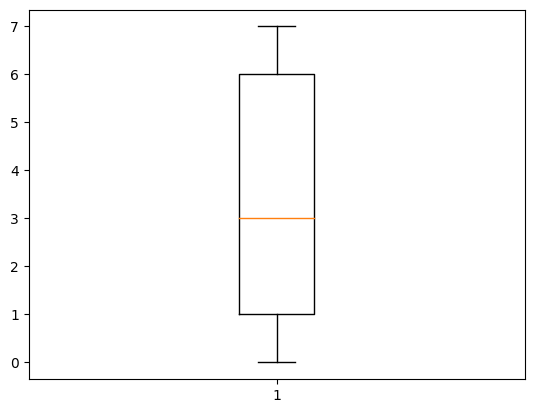

Number of upper outliers: 0
Number of lower outliers: 0
Percentage of ouliers: 0.0


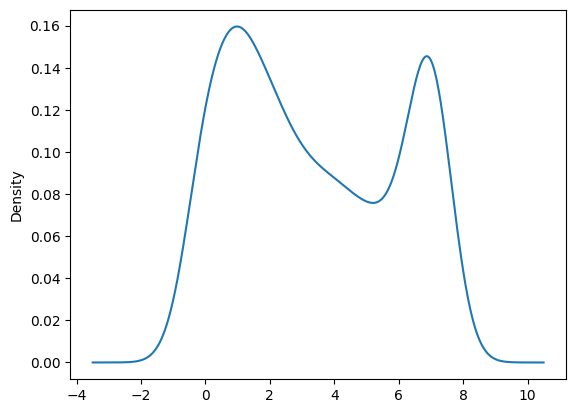

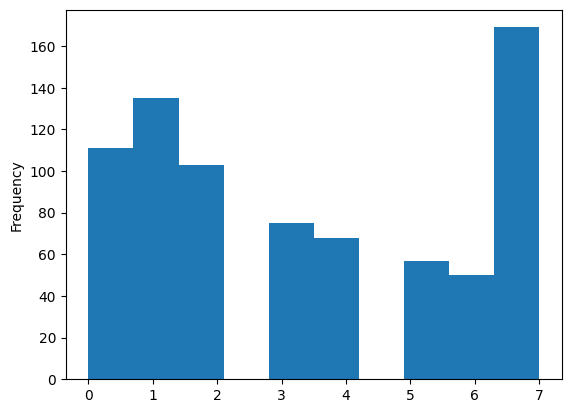


Variable:  Glucose
Describe:
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
Mode: 0     99
1    100
Name: Glucose, dtype: int64
Range: 199
IQR: 41.25
Var: 1022.2483142519557
Std: 31.97261819513622
Skew: 0.17375350179188992
Kurtosis: 0.6407798203735053


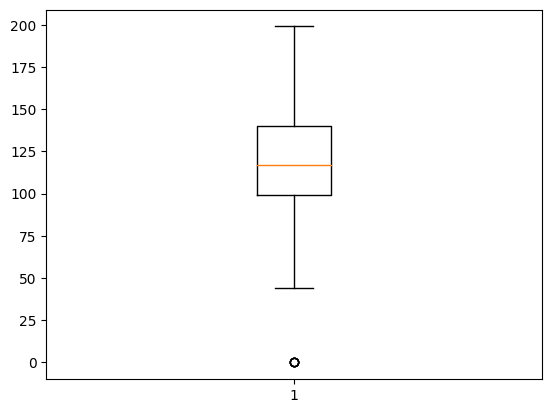

Number of upper outliers: 0
Number of lower outliers: 5
Percentage of ouliers: 0.006510416666666667


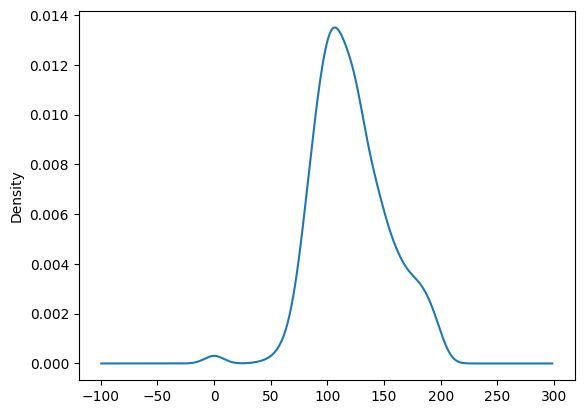

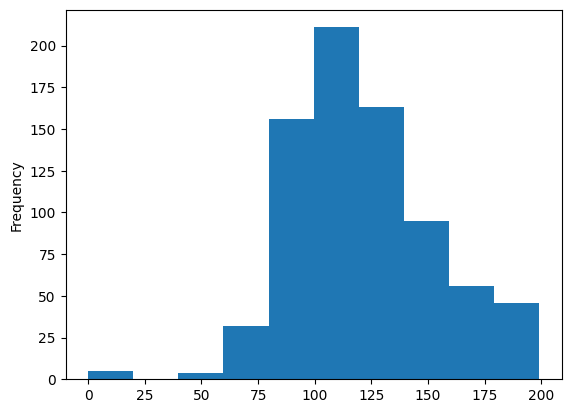


Variable:  BloodPressure
Describe:
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
Mode: 0    70
Name: BloodPressure, dtype: int64
Range: 122
IQR: 18.0
Var: 374.6472712271838
Std: 19.355807170644777
Skew: -1.8436079833551302
Kurtosis: 5.180156560082496


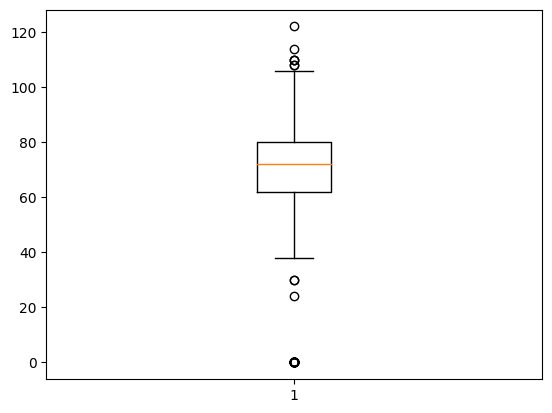

Number of upper outliers: 7
Number of lower outliers: 38
Percentage of ouliers: 0.05859375


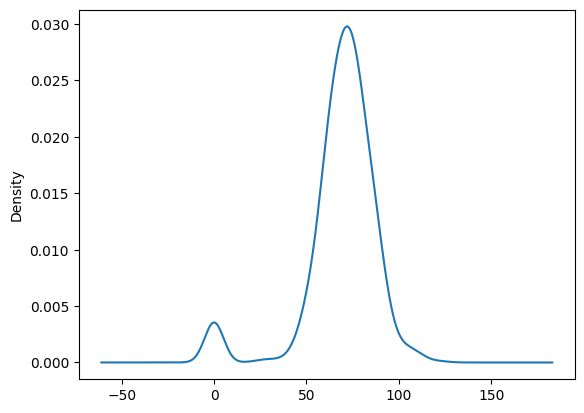

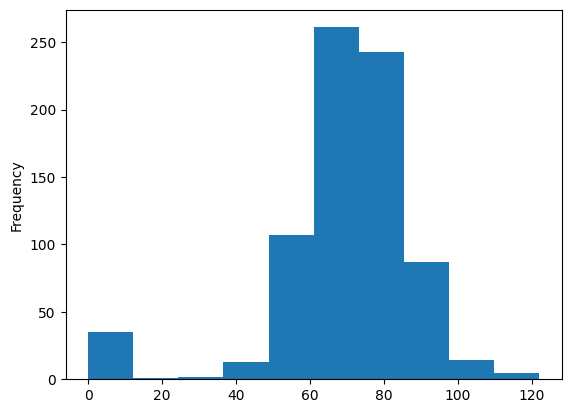


Variable:  SkinThickness
Describe:
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
Mode: 0    0
Name: SkinThickness, dtype: int64
Range: 99
IQR: 32.0
Var: 254.47324532811822
Std: 15.952217567727637
Skew: 0.10937249648187608
Kurtosis: -0.520071866153013


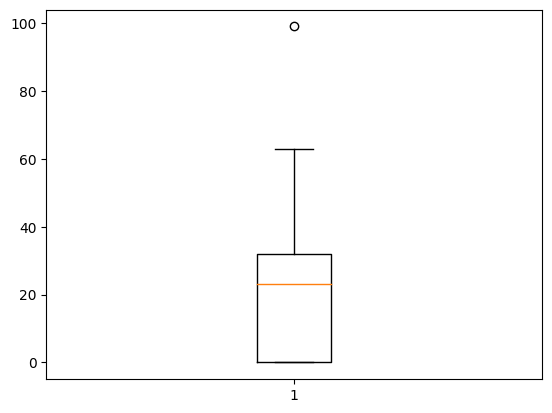

Number of upper outliers: 1
Number of lower outliers: 0
Percentage of ouliers: 0.0013020833333333333


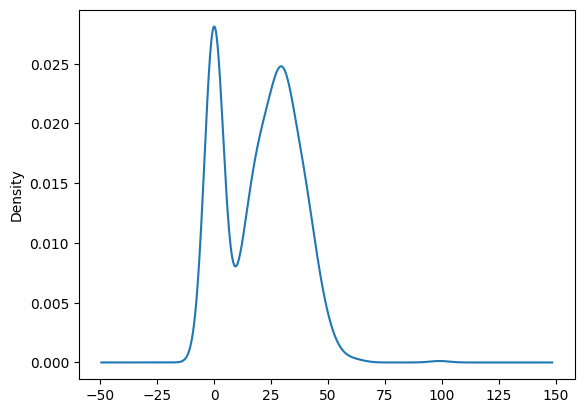

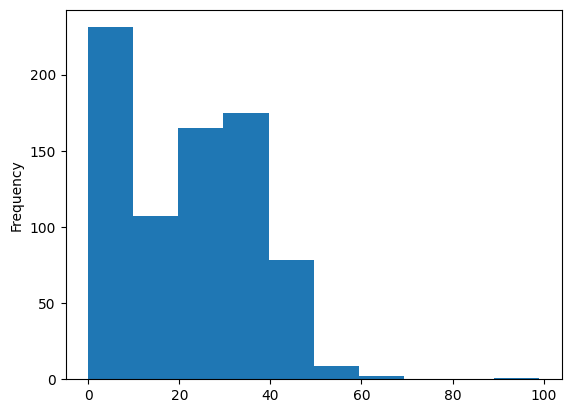


Variable:  Insulin
Describe:
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
Mode: 0    0
Name: Insulin, dtype: int64
Range: 846
IQR: 127.25
Var: 13281.180077955238
Std: 115.24400235133817
Skew: 2.272250858431574
Kurtosis: 7.2142595543487715


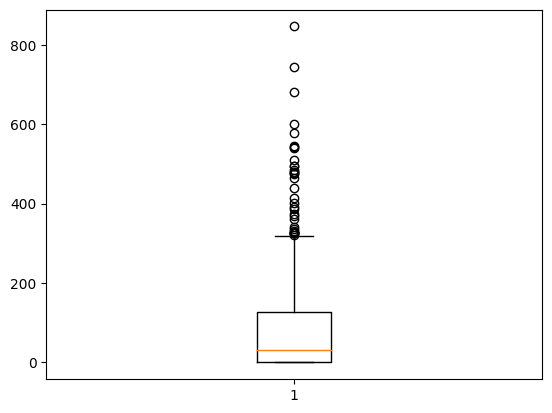

Number of upper outliers: 34
Number of lower outliers: 0
Percentage of ouliers: 0.044270833333333336


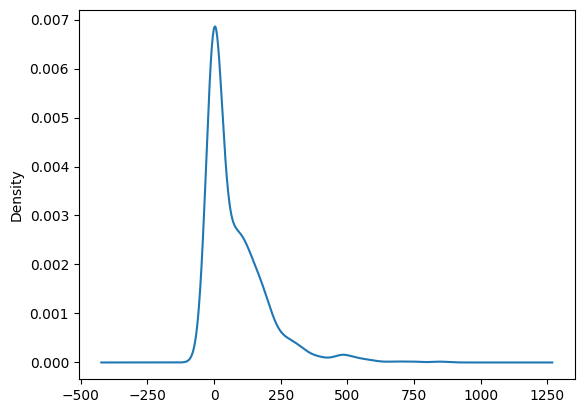

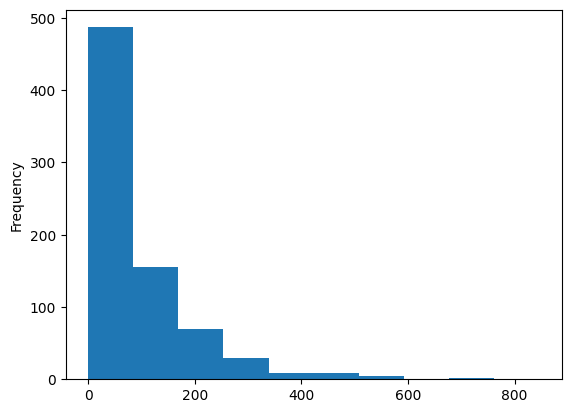


Variable:  BMI
Describe:
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
Mode: 0    32.0
Name: BMI, dtype: float64
Range: 67.1
IQR: 9.3
Var: 62.15998395738266
Std: 7.884160320375446
Skew: -0.42898158845356543
Kurtosis: 3.290442900816981


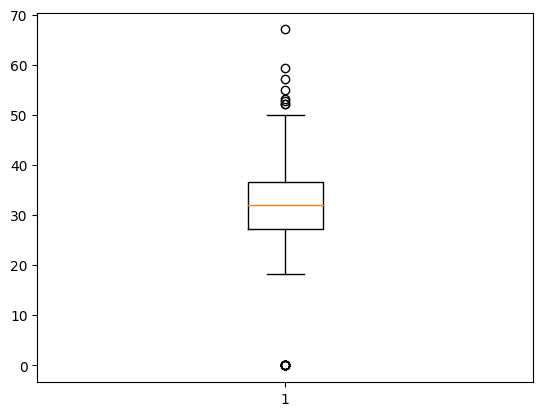

Number of upper outliers: 8
Number of lower outliers: 11
Percentage of ouliers: 0.024739583333333332


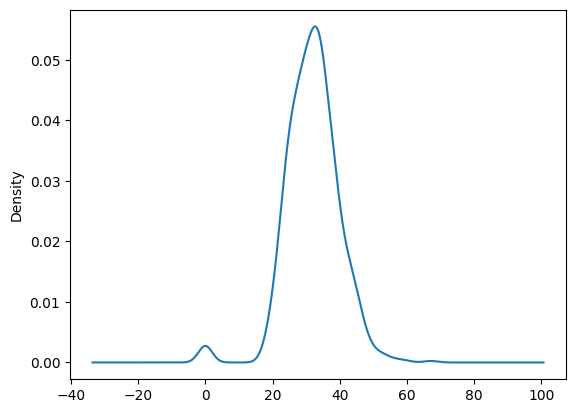

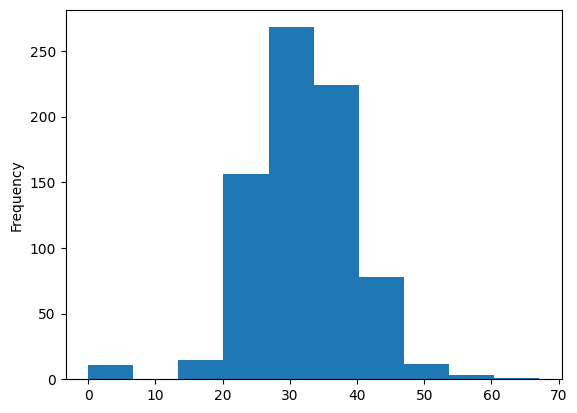


Variable:  DiabetesPedigreeFunction
Describe:
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
Mode: 0    0.254
1    0.258
Name: DiabetesPedigreeFunction, dtype: float64
Range: 2.342
IQR: 0.38249999999999995
Var: 0.1097786378731394
Std: 0.3313285950127749
Skew: 1.919911066307204
Kurtosis: 5.5949535279830584


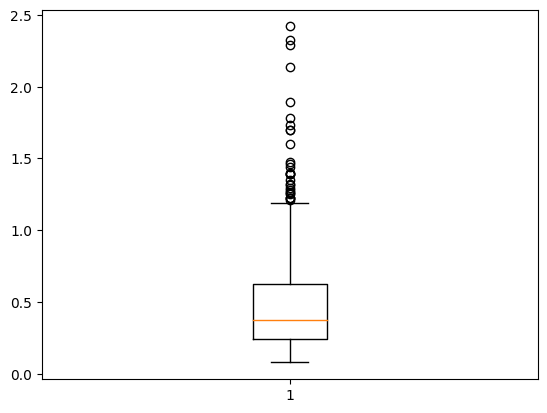

Number of upper outliers: 29
Number of lower outliers: 0
Percentage of ouliers: 0.037760416666666664


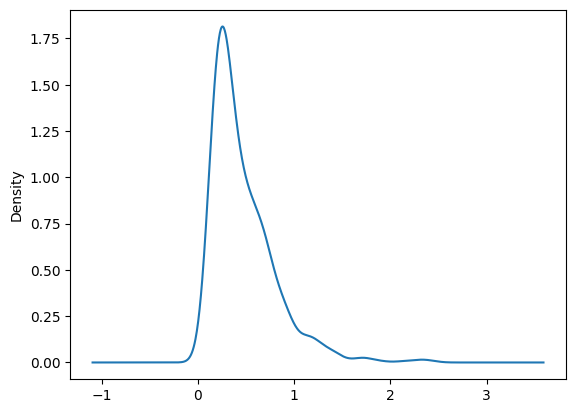

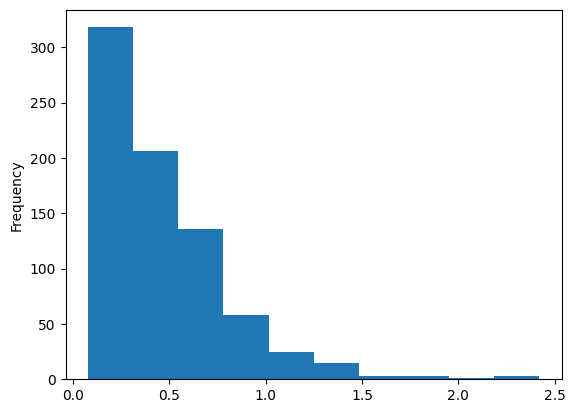


Variable:  Age
Describe:
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
Mode: 0    22
Name: Age, dtype: int64
Range: 60
IQR: 17.0
Var: 138.30304589037377
Std: 11.760231540678685
Skew: 1.1295967011444805
Kurtosis: 0.6431588885398942


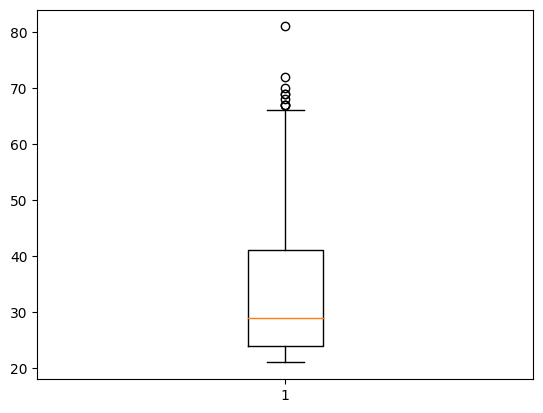

Number of upper outliers: 9
Number of lower outliers: 0
Percentage of ouliers: 0.01171875


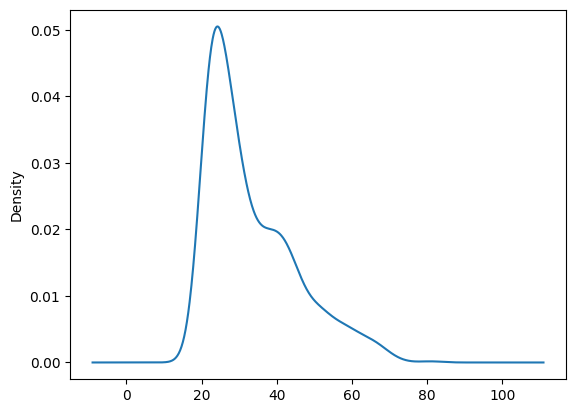

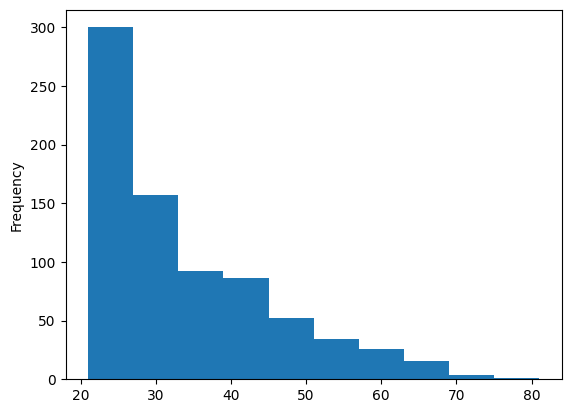

In [12]:
def check_outlier(df, feature):
    plt.boxplot(feature)
    plt.show()
    Q1 = np.percentile(feature, 25)
    Q3 = np.percentile(feature, 75)
    n_O_upper = df[feature > (Q3 + 1.5*scipy.stats.iqr(feature))].shape[0]
    print("Number of upper outliers:", n_O_upper)
    n_O_lower = df[feature < (Q1 - 1.5*scipy.stats.iqr(feature))].shape[0]
    print("Number of lower outliers:", n_O_lower)
    # Percentage of ouliers
    outliers_per = (n_O_lower + n_O_upper)/df.shape[0]
    print("Percentage of ouliers:", outliers_per)
    return Q1, Q3, n_O_upper, n_O_lower, outliers_per

def univariate_visualization_analysis_continuous_variable_new(feature):
    # Histogram
    feature.plot.kde()
    plt.show()
    feature.plot.hist()
    plt.show()

for con in num_cols:
  print('Variable: ', con)
  univariate_analysis_continuous_variable(data, data[con])
  check_outlier(data, data[con])
  univariate_visualization_analysis_continuous_variable_new(data[con])
  print()

"""
Comment:

    * Pregnancies: No outliers, the most common value is 7, with a negative kurtosis indicating a flat peak and right skewness.
    * Glucose: Has 5 lower outliers, the most common value is 99, with a positive kurtosis indicating a sharp peak and right skewness. The data is concentrated around the range of 100-125.
    * BloodPressure: Has quite a few outliers (~45 outliers), with positive kurtosis and left skewness. The data is concentrated around the value of 80.
    * SkinThickness: Only one outlier, with a negative kurtosis and right skewness. The data is mostly concentrated at the value of 0.
    * Insulin: Has many outliers (~34 outliers), with positive kurtosis and right skewness. The data is primarily centered around 0.
    * BMI: Not too many outliers (~19 outliers), the most common value is 32 (average level), with a distribution close to normal, positive kurtosis, and left skewness.
    * DiabetesPedigreeFunction: Has many outliers (~29 outliers), the most common value is 0.254, with the data concentrated around the range of 0-0.5. Positive kurtosis and right skewness.
    * Age: Relatively few outliers (~9 outliers), mostly falling within the range of 20-30 years old, with positive kurtosis and right skewness.
"""

# Univariate Analysis - Categorical Variables


['Outcome']

* Column: Outcome
2 unique values
Variable:  Outcome
0    500
1    268
Name: Outcome, dtype: int64


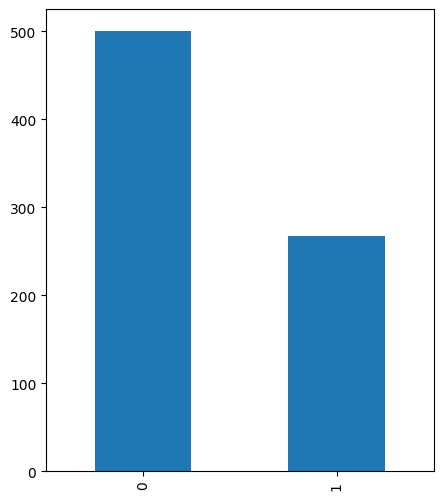

In [13]:
cat_cols = data.select_dtypes('category').columns.tolist()
print(cat_cols)

for column in cat_cols:
  print('\n* Column:', column)
  print(len(data[column].unique()), 'unique values')

def univariate_analysis_categorical_variable(df, group_by_col):
    print(df[group_by_col].value_counts())
    df[group_by_col].value_counts().plot.bar(figsize=(5, 6))
    plt.show()

for cat in cat_cols:
  print('Variable: ', cat)
  univariate_analysis_categorical_variable(data, cat)
  print()

Comment:
    
    * Outcome: The number of people without the disease is significantly higher, nearly double (~0.5 times), compared to the number of people with the disease.
"""

# Bivariate Analysis - Numerical - Categorical
    ## Input - Output

# ANOVA


2 variables: Outcome and Pregnancies


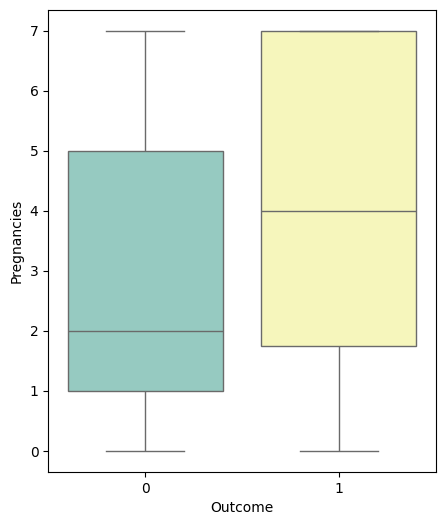

ANOVA table:                 sum_sq     df          F        PR(>F)
Outcome    221.558225    1.0  35.716497  3.495614e-09
Residual  4751.686567  766.0        NaN           NaN

2 variables: Outcome and Glucose


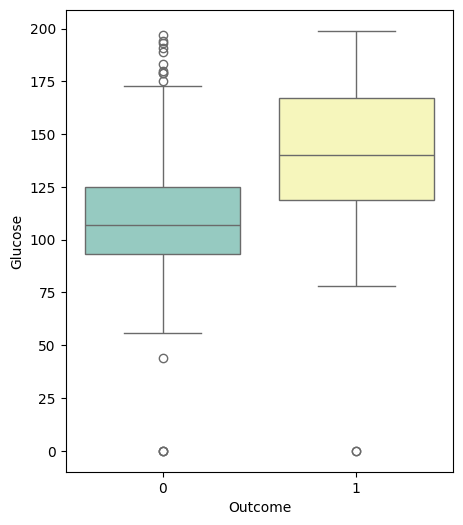

ANOVA table:                   sum_sq     df           F        PR(>F)
Outcome   170689.421957    1.0  213.161752  8.935432e-43
Residual  613375.035075  766.0         NaN           NaN

2 variables: Outcome and BloodPressure


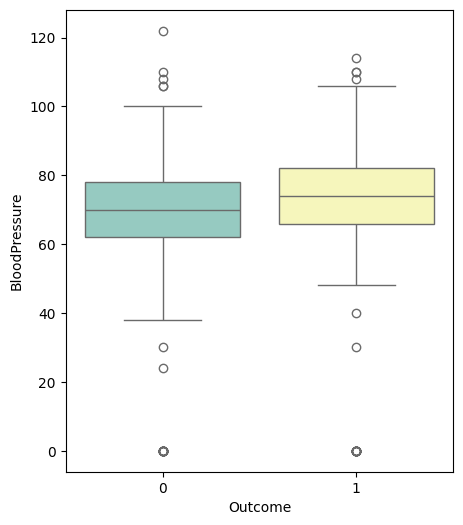

ANOVA table:                   sum_sq     df        F    PR(>F)
Outcome     1216.627569    1.0  3.25695  0.071514
Residual  286137.829463  766.0      NaN       NaN

2 variables: Outcome and SkinThickness


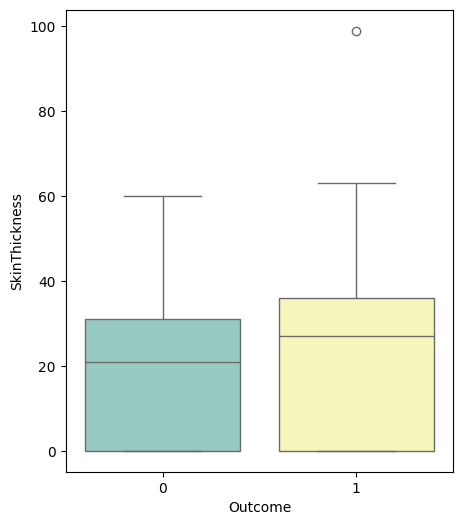

ANOVA table:                   sum_sq     df         F    PR(>F)
Outcome     1090.651047    1.0  4.304381  0.038348
Residual  194090.328119  766.0       NaN       NaN

2 variables: Outcome and Insulin


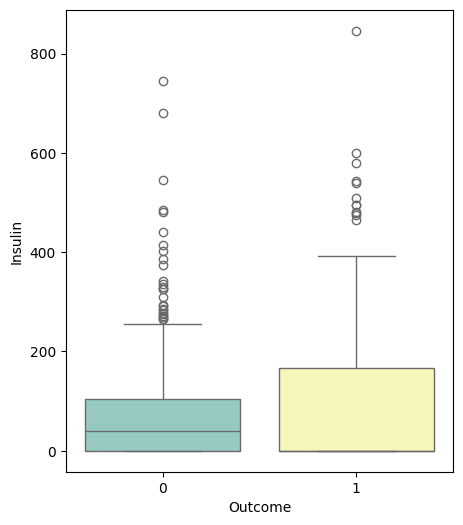

ANOVA table:                  sum_sq     df          F    PR(>F)
Outcome   1.736090e+05    1.0  13.281108  0.000286
Residual  1.001306e+07  766.0        NaN       NaN

2 variables: Outcome and BMI


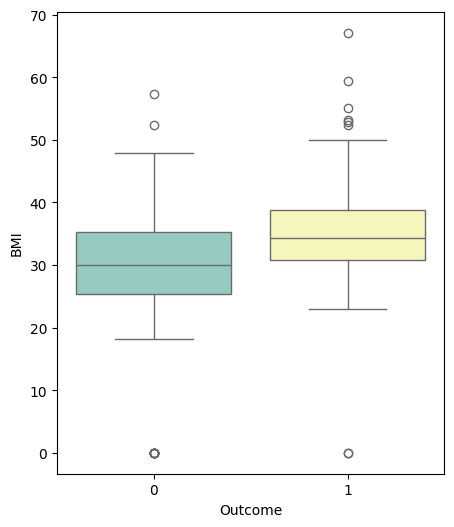

ANOVA table:                  sum_sq     df          F        PR(>F)
Outcome    4084.471441    1.0  71.772072  1.229807e-16
Residual  43592.236255  766.0        NaN           NaN

2 variables: Outcome and DiabetesPedigreeFunction


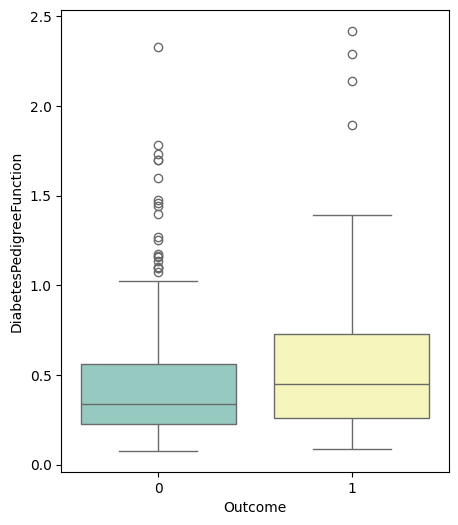

ANOVA table:               sum_sq     df        F    PR(>F)
Outcome    2.544679    1.0  23.8713  0.000001
Residual  81.655537  766.0      NaN       NaN

2 variables: Outcome and Age


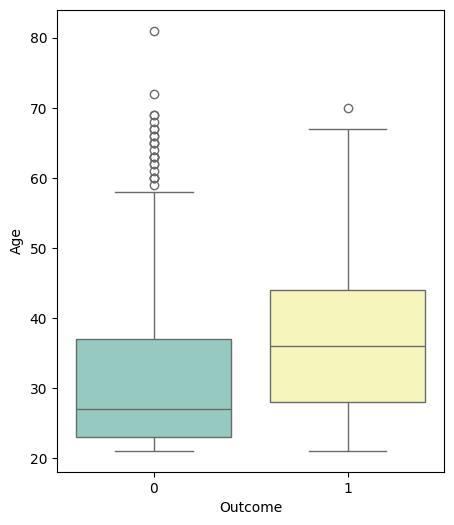

ANOVA table:                   sum_sq     df          F        PR(>F)
Outcome     6026.695153    1.0  46.140611  2.209975e-11
Residual  100051.741045  766.0        NaN           NaN



In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


from statsmodels.stats.weightstats import ztest as ztest

def variables_cont_cat(df, col1, col2):

    df_sub = df[[col1, col2]]
    plt.figure(figsize=(5,6))
    sns.boxplot(x=col1, y=col2, data=df_sub, palette="Set3")
    plt.show()
    chuoi = str(col2)+' ~ '+str(col1)
    model = ols(chuoi, data=df_sub).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print('ANOVA table: ', anova_table)

col1 = 'Outcome'
alpha = 0.05
for i in range(0, len(num_cols)):
    col2 = num_cols[i]
    print('2 variables:', col1, 'and', col2)
    variables_cont_cat(data, col1, col2)
    print()

Comment:

    * Outcome and Pregnancies: have an influence with a P-value (3.495614e-09) < 0.05
    * Outcome and Glucose: have a significant influence with a P-value (8.935432e-43) < 0.05
    * Outcome and BloodPressure: do not have a significant influence with a P-value (0.071514) > 0.05
    * Outcome and SkinThickness: have an influence with a P-value (0.038348) < 0.05
    * Outcome and Insulin: have an influence with a P-value (0.000286) < 0.05
    * Outcome and BMI: have a significant influence with a P-value (1.229807e-16) < 0.05
    * Outcome and DiabetesPedigreeFunction: have a significant influence with a P-value (0.000001) < 0.05
    * Outcome and Age: have a significant influence with a P-value (2.209975e-11) < 0.05

Explanation: The P-value obtained from the ANOVA analysis is significant (P < 0.05), indicating that there is a difference between the groups (Pregnancies, Glucose, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) and the types of Outcome (non-disease and disease).
Except for BloodPressure, where the P-value is > 0.05, suggesting no significant difference.

# Z-TEST (sample size > 30)


Consider the respective Numerical variables in the two groups: 1: Disease & 0: Non-disease of the Outcome.

    * H0: There is no significant difference in the mean of the respective Numerical variables between 1: Disease & 0: Non-disease.
    * H1: There is a significant difference in the mean of the respective Numerical variables between 1: Disease & 0: Non-disease.

In [15]:
from statsmodels.stats.weightstats import ztest

def z_test_loop(data, group_column, value_columns, alpha):

    results = {}
    for column in value_columns:
        group1_data = data[data[group_column] == 0][column]
        group2_data = data[data[group_column] == 1][column]
        z_score, p_value = ztest(group1_data, group2_data, value=group1_data.mean())
        if p_value > alpha:
            result = "Accept the null hypothesis that the means are equal."
        else:
            result = "Reject the null hypothesis that the means are equal."
        results[column] = result
    return results

group_column = 'Outcome'
alpha = 0.05
num_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for i in range(len(num_cols)):
    value_columns = [num_cols[i]]
    results = z_test_loop(data, group_column, value_columns, alpha)
    for column, result in results.items():
        print("Column: {}".format(column))
        print(result)
        print()

Column: Pregnancies
Reject the null hypothesis that the means are equal.

Column: Glucose
Reject the null hypothesis that the means are equal.

Column: BloodPressure
Reject the null hypothesis that the means are equal.

Column: SkinThickness
Reject the null hypothesis that the means are equal.

Column: Insulin
Reject the null hypothesis that the means are equal.

Column: BMI
Reject the null hypothesis that the means are equal.

Column: DiabetesPedigreeFunction
Reject the null hypothesis that the means are equal.

Column: Age
Reject the null hypothesis that the means are equal.



Comment:

Because the p-values are smaller than 0.05, we have enough evidence to reject the null hypothesis H0.

# Bivariate Analysis - Numerical - Numerical
    ## Input - Output


Correlation between 2 variables: Pregnancies and Glucose
             Pregnancies   Glucose
Pregnancies     1.000000  0.139817
Glucose         0.139817  1.000000
Pearson Correlation between 2 variables: Pregnancies and Glucose
PearsonRResult(statistic=0.13981726511419024, pvalue=0.00010126980331333187)
pearman Correlation between 2 variables: Pregnancies and Glucose
SignificanceResult(statistic=0.13649049554762485, pvalue=0.00014815349757726185)


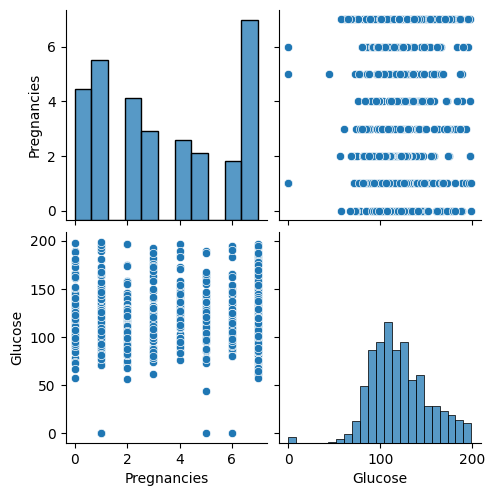


Correlation between 2 variables: Pregnancies and BloodPressure
               Pregnancies  BloodPressure
Pregnancies       1.000000       0.142479
BloodPressure     0.142479       1.000000
Pearson Correlation between 2 variables: Pregnancies and BloodPressure
PearsonRResult(statistic=0.14247853171322128, pvalue=7.423715746836161e-05)
pearman Correlation between 2 variables: Pregnancies and BloodPressure
SignificanceResult(statistic=0.1841988085497407, pvalue=2.7415533435670016e-07)


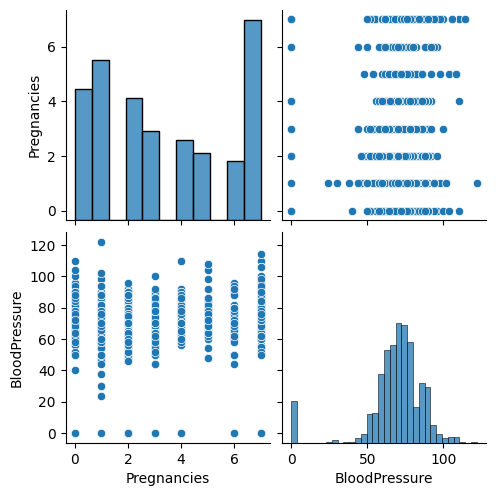


Correlation between 2 variables: Pregnancies and SkinThickness
               Pregnancies  SkinThickness
Pregnancies       1.000000      -0.111216
SkinThickness    -0.111216       1.000000
Pearson Correlation between 2 variables: Pregnancies and SkinThickness
PearsonRResult(statistic=-0.1112156437716331, pvalue=0.0020242000155824462)
pearman Correlation between 2 variables: Pregnancies and SkinThickness
SignificanceResult(statistic=-0.0874734321841645, pvalue=0.015315314532433033)


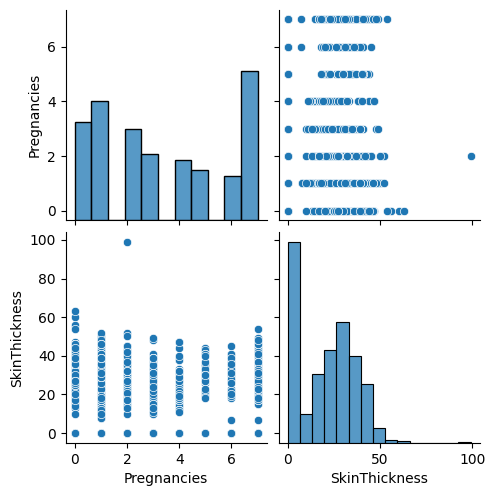


Correlation between 2 variables: Pregnancies and Insulin
             Pregnancies   Insulin
Pregnancies     1.000000 -0.074047
Insulin        -0.074047  1.000000
Pearson Correlation between 2 variables: Pregnancies and Insulin
PearsonRResult(statistic=-0.0740469169721383, pvalue=0.040216057214553284)
pearman Correlation between 2 variables: Pregnancies and Insulin
SignificanceResult(statistic=-0.12503290557504962, pvalue=0.0005146617427700772)


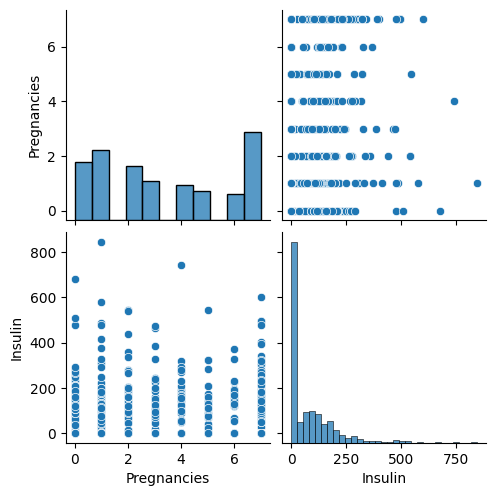


Correlation between 2 variables: Pregnancies and BMI
             Pregnancies       BMI
Pregnancies     1.000000 -0.010986
BMI            -0.010986  1.000000
Pearson Correlation between 2 variables: Pregnancies and BMI
PearsonRResult(statistic=-0.010985530116879874, pvalue=0.7611635206911105)
pearman Correlation between 2 variables: Pregnancies and BMI
SignificanceResult(statistic=-0.0035138534186105732, pvalue=0.9225513284970828)


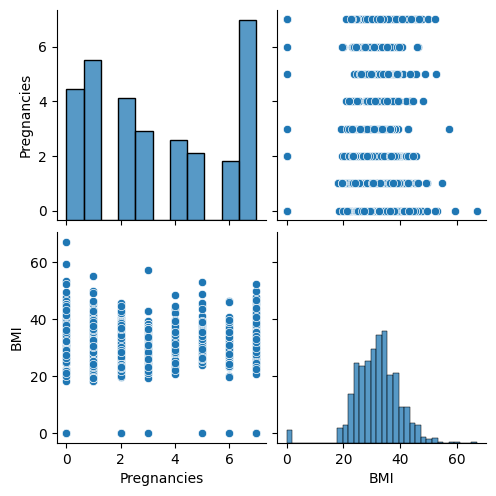


Correlation between 2 variables: Pregnancies and DiabetesPedigreeFunction
                          Pregnancies  DiabetesPedigreeFunction
Pregnancies                  1.000000                 -0.049804
DiabetesPedigreeFunction    -0.049804                  1.000000
Pearson Correlation between 2 variables: Pregnancies and DiabetesPedigreeFunction
PearsonRResult(statistic=-0.049804146706290714, pvalue=0.1679500695516646)
pearman Correlation between 2 variables: Pregnancies and DiabetesPedigreeFunction
SignificanceResult(statistic=-0.0416399035209076, pvalue=0.24908315443367818)


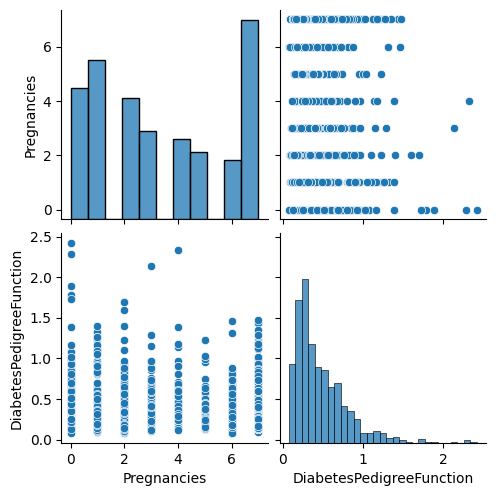


Correlation between 2 variables: Pregnancies and Age
             Pregnancies       Age
Pregnancies     1.000000  0.550416
Age             0.550416  1.000000
Pearson Correlation between 2 variables: Pregnancies and Age
PearsonRResult(statistic=0.5504159254620935, pvalue=4.852347986021344e-62)
pearman Correlation between 2 variables: Pregnancies and Age
SignificanceResult(statistic=0.6068031974025934, pvalue=1.9724307645780995e-78)


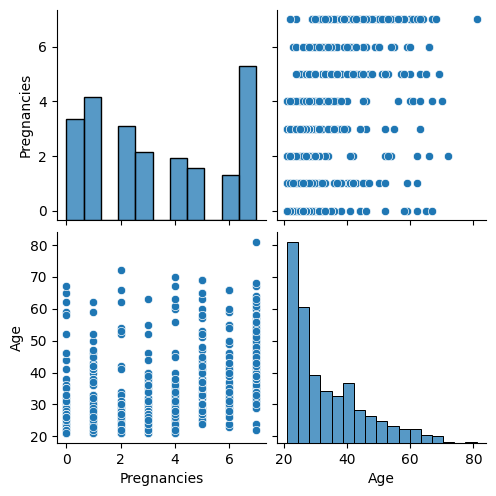


Correlation between 2 variables: Glucose and BloodPressure
               Glucose  BloodPressure
Glucose        1.00000        0.15259
BloodPressure  0.15259        1.00000
Pearson Correlation between 2 variables: Glucose and BloodPressure
PearsonRResult(statistic=0.15258958656866445, pvalue=2.169507153023399e-05)
pearman Correlation between 2 variables: Glucose and BloodPressure
SignificanceResult(statistic=0.23519061347818354, pvalue=4.1123062430199575e-11)


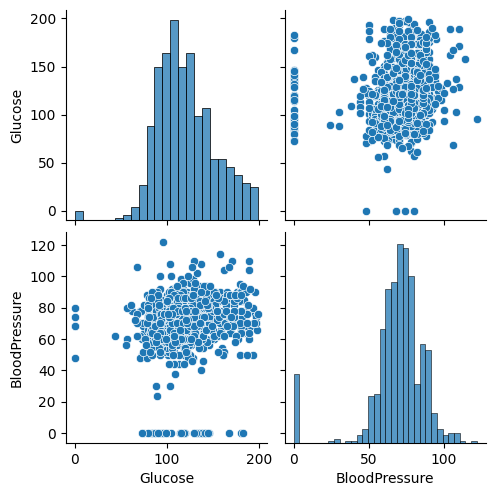


Correlation between 2 variables: Glucose and SkinThickness
                Glucose  SkinThickness
Glucose        1.000000       0.057328
SkinThickness  0.057328       1.000000
Pearson Correlation between 2 variables: Glucose and SkinThickness
PearsonRResult(statistic=0.05732789073817704, pvalue=0.11241414950024281)
pearman Correlation between 2 variables: Glucose and SkinThickness
SignificanceResult(statistic=0.06002215292552161, pvalue=0.09647826522340339)


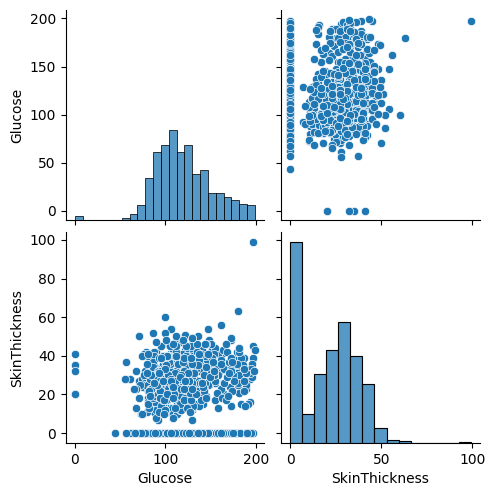


Correlation between 2 variables: Glucose and Insulin
          Glucose   Insulin
Glucose  1.000000  0.331357
Insulin  0.331357  1.000000
Pearson Correlation between 2 variables: Glucose and Insulin
PearsonRResult(statistic=0.33135710992020906, pvalue=3.882623944271761e-21)
pearman Correlation between 2 variables: Glucose and Insulin
SignificanceResult(statistic=0.21320580456193103, pvalue=2.4068717603414775e-09)


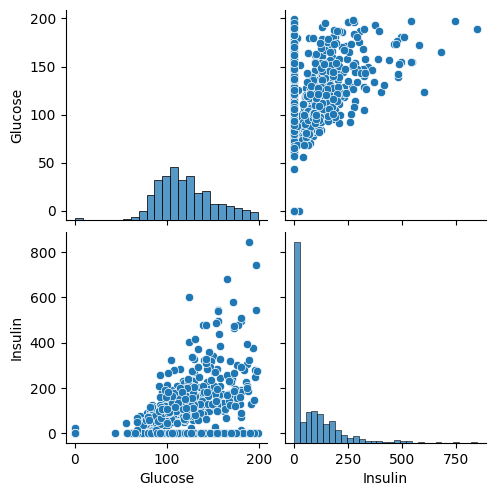


Correlation between 2 variables: Glucose and BMI
          Glucose       BMI
Glucose  1.000000  0.221071
BMI      0.221071  1.000000
Pearson Correlation between 2 variables: Glucose and BMI
PearsonRResult(statistic=0.22107106945898294, pvalue=5.891412527084351e-10)
pearman Correlation between 2 variables: Glucose and BMI
SignificanceResult(statistic=0.23114119425993723, pvalue=8.983879584927627e-11)


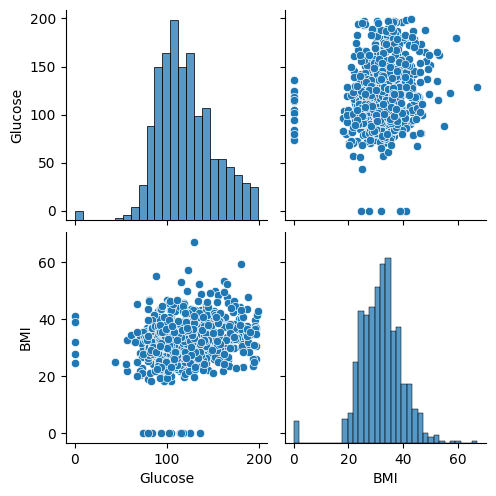


Correlation between 2 variables: Glucose and DiabetesPedigreeFunction
                           Glucose  DiabetesPedigreeFunction
Glucose                   1.000000                  0.137337
DiabetesPedigreeFunction  0.137337                  1.000000
Pearson Correlation between 2 variables: Glucose and DiabetesPedigreeFunction
PearsonRResult(statistic=0.1373372998283707, pvalue=0.00013458781437157466)
pearman Correlation between 2 variables: Glucose and DiabetesPedigreeFunction
SignificanceResult(statistic=0.09129336487628698, pvalue=0.011368518031685176)


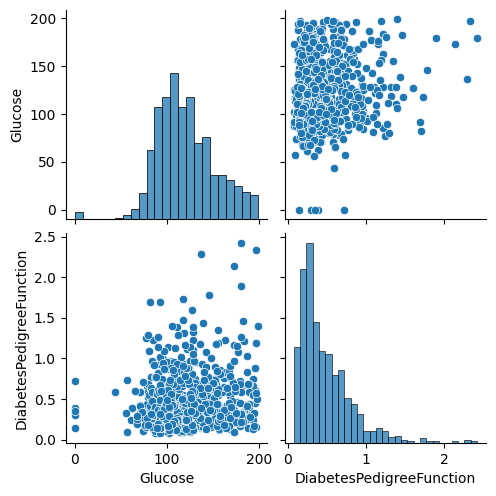


Correlation between 2 variables: Glucose and Age
          Glucose       Age
Glucose  1.000000  0.263514
Age      0.263514  1.000000
Pearson Correlation between 2 variables: Glucose and Age
PearsonRResult(statistic=0.26351431982433354, pvalue=1.1501118165164534e-13)
pearman Correlation between 2 variables: Glucose and Age
SignificanceResult(statistic=0.28504471995581177, pvalue=8.000047747361511e-16)


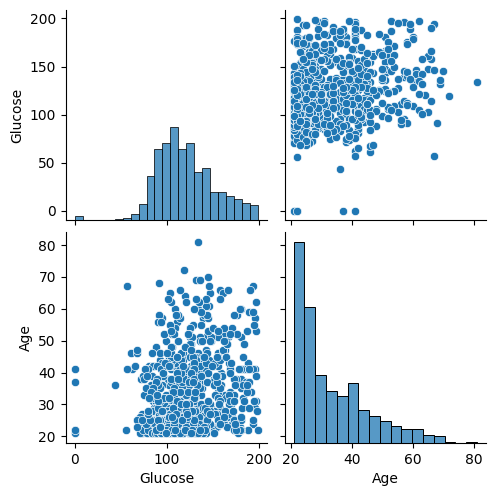


Correlation between 2 variables: BloodPressure and SkinThickness
               BloodPressure  SkinThickness
BloodPressure       1.000000       0.207371
SkinThickness       0.207371       1.000000
Pearson Correlation between 2 variables: BloodPressure and SkinThickness
PearsonRResult(statistic=0.20737053840307085, pvalue=6.60668746051878e-09)
pearman Correlation between 2 variables: BloodPressure and SkinThickness
SignificanceResult(statistic=0.12648587140494302, pvalue=0.0004419264197632398)


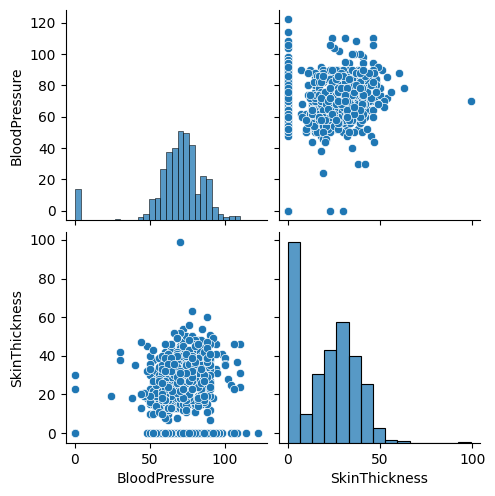


Correlation between 2 variables: BloodPressure and Insulin
               BloodPressure   Insulin
BloodPressure       1.000000  0.088933
Insulin             0.088933  1.000000
Pearson Correlation between 2 variables: BloodPressure and Insulin
PearsonRResult(statistic=0.088933378373193, pvalue=0.013683499093534704)
pearman Correlation between 2 variables: BloodPressure and Insulin
SignificanceResult(statistic=-0.0067705718113126355, pvalue=0.8514033781097565)


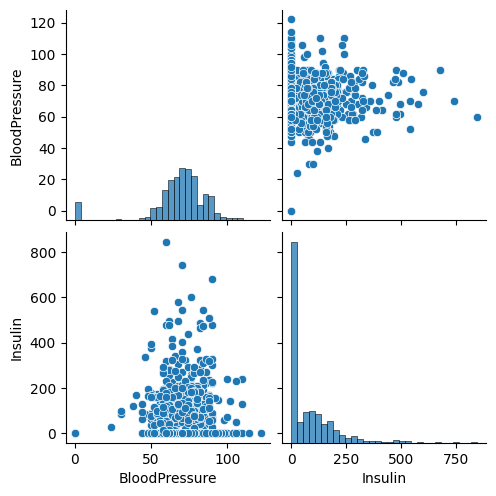


Correlation between 2 variables: BloodPressure and BMI
               BloodPressure       BMI
BloodPressure       1.000000  0.281805
BMI                 0.281805  1.000000
Pearson Correlation between 2 variables: BloodPressure and BMI
PearsonRResult(statistic=0.28180528884991063, pvalue=1.7378883832374126e-15)
pearman Correlation between 2 variables: BloodPressure and BMI
SignificanceResult(statistic=0.29287043032041404, pvalue=1.1772236048830849e-16)


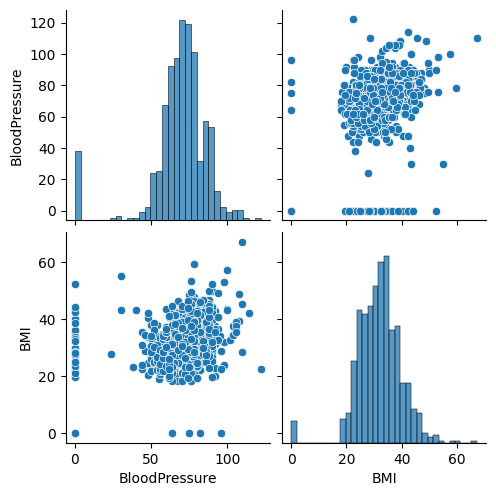


Correlation between 2 variables: BloodPressure and DiabetesPedigreeFunction
                          BloodPressure  DiabetesPedigreeFunction
BloodPressure                  1.000000                  0.041265
DiabetesPedigreeFunction       0.041265                  1.000000
Pearson Correlation between 2 variables: BloodPressure and DiabetesPedigreeFunction
PearsonRResult(statistic=0.041264947930098585, pvalue=0.2533743720192343)
pearman Correlation between 2 variables: BloodPressure and DiabetesPedigreeFunction
SignificanceResult(statistic=0.030046334854222177, pvalue=0.4056912723988306)


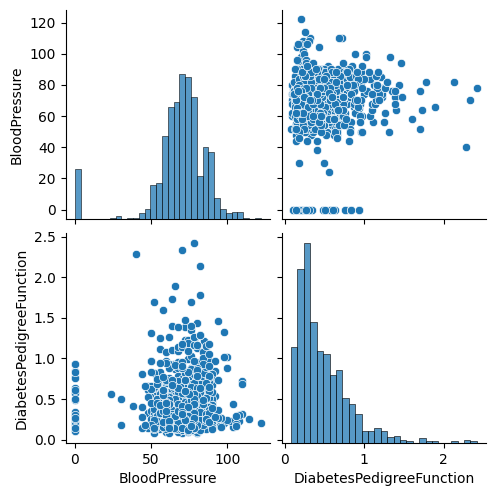


Correlation between 2 variables: BloodPressure and Age
               BloodPressure       Age
BloodPressure       1.000000  0.239528
Age                 0.239528  1.000000
Pearson Correlation between 2 variables: BloodPressure and Age
PearsonRResult(statistic=0.23952794642136352, pvalue=1.752051213710773e-11)
pearman Correlation between 2 variables: BloodPressure and Age
SignificanceResult(statistic=0.3508945932216354, pvalue=1.1358511942976324e-23)


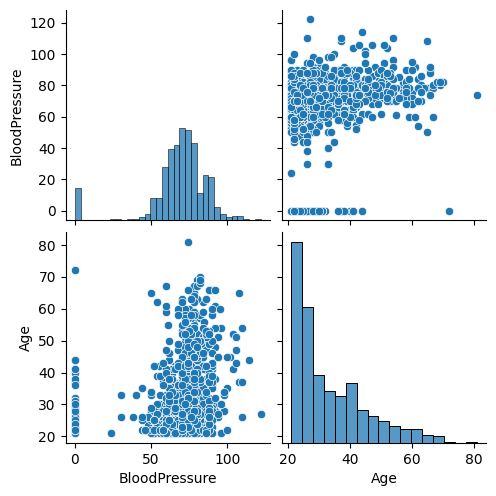


Correlation between 2 variables: SkinThickness and Insulin
               SkinThickness   Insulin
SkinThickness       1.000000  0.436783
Insulin             0.436783  1.000000
Pearson Correlation between 2 variables: SkinThickness and Insulin
PearsonRResult(statistic=0.43678257012001304, pvalue=4.043577432054043e-37)
pearman Correlation between 2 variables: SkinThickness and Insulin
SignificanceResult(statistic=0.5410001366628014, pvalue=1.3420383496117885e-59)


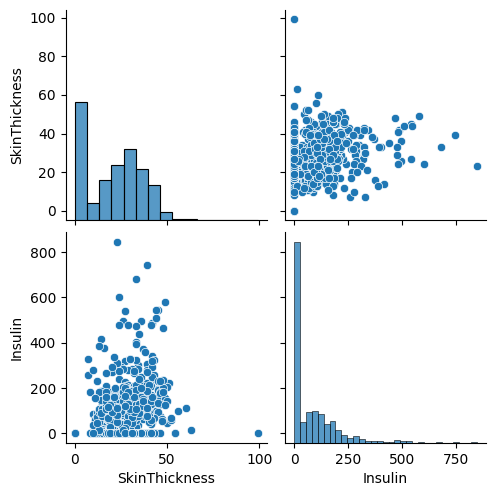


Correlation between 2 variables: SkinThickness and BMI
               SkinThickness       BMI
SkinThickness       1.000000  0.392573
BMI                 0.392573  1.000000
Pearson Correlation between 2 variables: SkinThickness and BMI
PearsonRResult(statistic=0.3925732041590383, pvalue=1.0548761717292765e-29)
pearman Correlation between 2 variables: SkinThickness and BMI
SignificanceResult(statistic=0.44361450828836047, pvalue=2.28641119631454e-38)


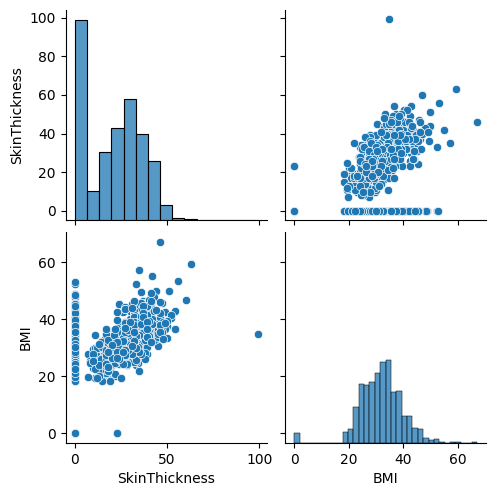


Correlation between 2 variables: SkinThickness and DiabetesPedigreeFunction
                          SkinThickness  DiabetesPedigreeFunction
SkinThickness                  1.000000                  0.183928
DiabetesPedigreeFunction       0.183928                  1.000000
Pearson Correlation between 2 variables: SkinThickness and DiabetesPedigreeFunction
PearsonRResult(statistic=0.18392757295416323, pvalue=2.8561794700267096e-07)
pearman Correlation between 2 variables: SkinThickness and DiabetesPedigreeFunction
SignificanceResult(statistic=0.18039048342264027, pvalue=4.845697706227758e-07)


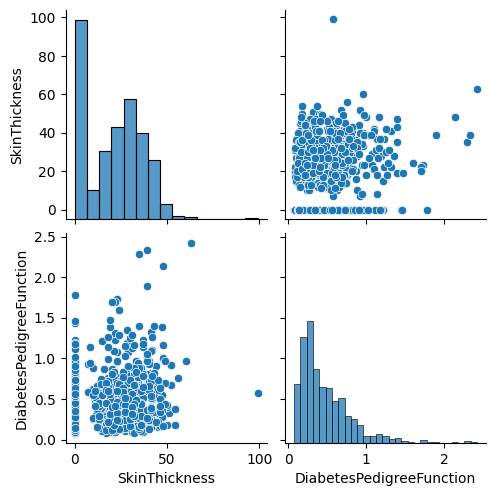


Correlation between 2 variables: SkinThickness and Age
               SkinThickness      Age
SkinThickness        1.00000 -0.11397
Age                 -0.11397  1.00000
Pearson Correlation between 2 variables: SkinThickness and Age
PearsonRResult(statistic=-0.11397026236774166, pvalue=0.0015582784662140493)
pearman Correlation between 2 variables: SkinThickness and Age
SignificanceResult(statistic=-0.06679492114381454, pvalue=0.06429530382439858)


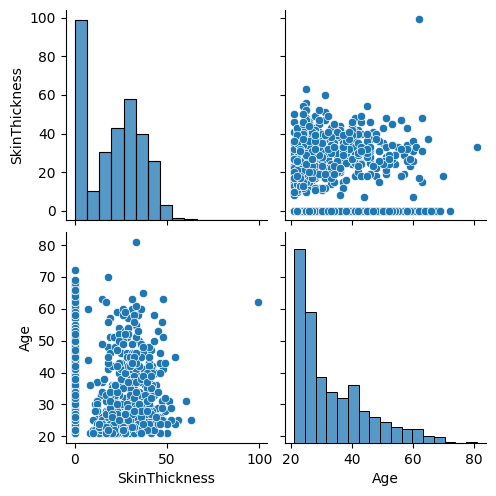


Correlation between 2 variables: Insulin and BMI
          Insulin       BMI
Insulin  1.000000  0.197859
BMI      0.197859  1.000000
Pearson Correlation between 2 variables: Insulin and BMI
PearsonRResult(statistic=0.197859056493101, pvalue=3.219695389153263e-08)
pearman Correlation between 2 variables: Insulin and BMI
SignificanceResult(statistic=0.19272568063619994, pvalue=7.333072200860229e-08)


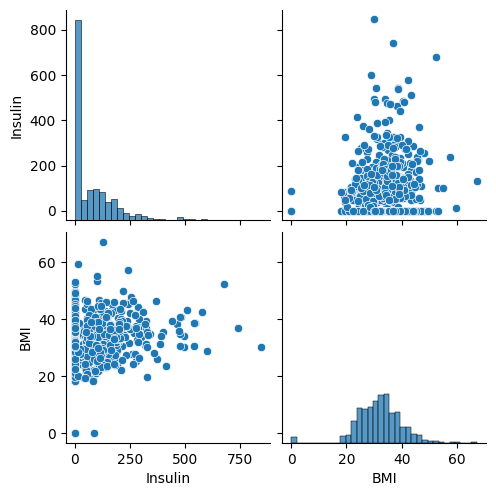


Correlation between 2 variables: Insulin and DiabetesPedigreeFunction
                           Insulin  DiabetesPedigreeFunction
Insulin                   1.000000                  0.185071
DiabetesPedigreeFunction  0.185071                  1.000000
Pearson Correlation between 2 variables: Insulin and DiabetesPedigreeFunction
PearsonRResult(statistic=0.18507092916809909, pvalue=2.4022640739424854e-07)
pearman Correlation between 2 variables: Insulin and DiabetesPedigreeFunction
SignificanceResult(statistic=0.22115049154027588, pvalue=5.806688395075495e-10)


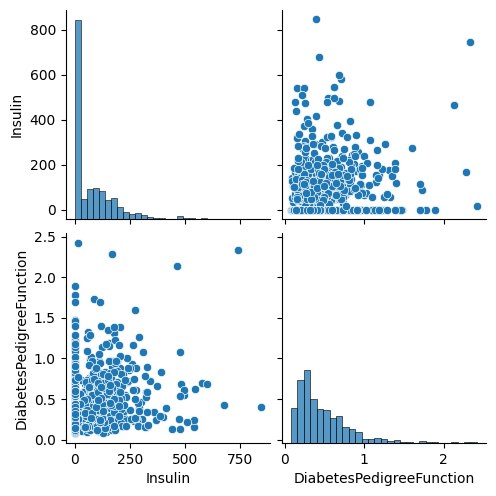


Correlation between 2 variables: Insulin and Age
          Insulin       Age
Insulin  1.000000 -0.042163
Age     -0.042163  1.000000
Pearson Correlation between 2 variables: Insulin and Age
PearsonRResult(statistic=-0.04216295473537686, pvalue=0.2431821522345507)
pearman Correlation between 2 variables: Insulin and Age
SignificanceResult(statistic=-0.1142129172644335, pvalue=0.0015223678867720251)


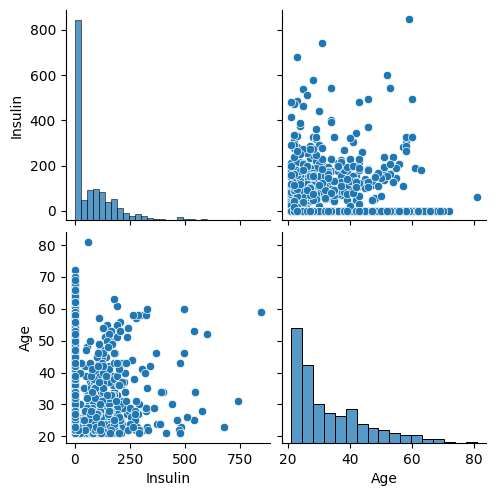


Correlation between 2 variables: BMI and DiabetesPedigreeFunction
                               BMI  DiabetesPedigreeFunction
BMI                       1.000000                  0.140647
DiabetesPedigreeFunction  0.140647                  1.000000
Pearson Correlation between 2 variables: BMI and DiabetesPedigreeFunction
PearsonRResult(statistic=0.14064695254510517, pvalue=9.197970126957359e-05)
pearman Correlation between 2 variables: BMI and DiabetesPedigreeFunction
SignificanceResult(statistic=0.14119202973187467, pvalue=8.632020536452547e-05)


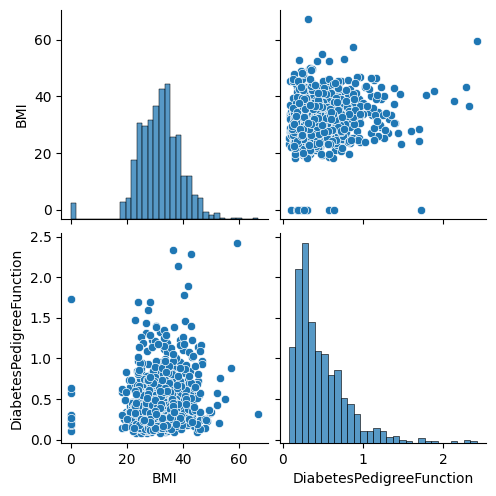


Correlation between 2 variables: BMI and Age
          BMI       Age
BMI  1.000000  0.036242
Age  0.036242  1.000000
Pearson Correlation between 2 variables: BMI and Age
PearsonRResult(statistic=0.03624187009229414, pvalue=0.31583298987244957)
pearman Correlation between 2 variables: BMI and Age
SignificanceResult(statistic=0.13118588054276872, pvalue=0.00026700396116009713)


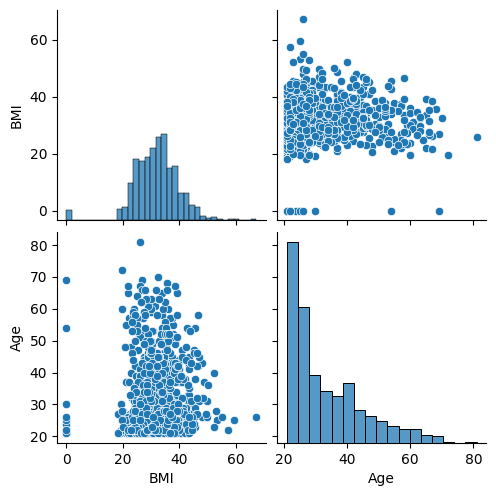


Correlation between 2 variables: DiabetesPedigreeFunction and Age
                          DiabetesPedigreeFunction       Age
DiabetesPedigreeFunction                  1.000000  0.033561
Age                                       0.033561  1.000000
Pearson Correlation between 2 variables: DiabetesPedigreeFunction and Age
PearsonRResult(statistic=0.03356131243480553, pvalue=0.3529797336668882)
pearman Correlation between 2 variables: DiabetesPedigreeFunction and Age
SignificanceResult(statistic=0.0429085877090879, pvalue=0.23494064827719705)


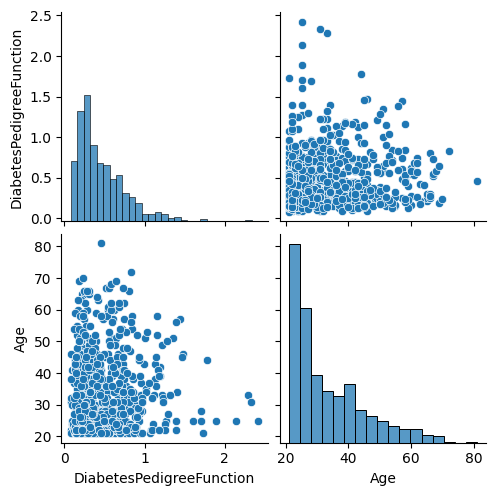

In [16]:
for i in range(0, len(num_cols)):
    col1 = num_cols[i]
    for j in range(i+1, len(num_cols)):
        col2 = num_cols[j]
        print('Correlation between 2 variables:', col1, 'and', col2)
        print(data[[col1, col2]].corr())
        print('Pearson Correlation between 2 variables:', col1, 'and', col2)
        print(stats.pearsonr(data[col1], data[col2]))
        print('pearman Correlation between 2 variables:', col1, 'and', col2)
        print(stats.spearmanr(data[col1], data[col2]))
        sns.pairplot(data[[col1, col2]])
        plt.show()
        print()


Comment:

    * Pregnancies and Glucose: have a correlation because the p-value is < 0.05.
    * Pregnancies and BloodPressure: have a correlation because the p-value is < 0.05.
    * Pregnancies and SkinThickness: have a correlation because the p-value is < 0.05.
    * Pregnancies and Insulin: have a correlation because the p-value is < 0.05.
    * Pregnancies and BMI: do not have a correlation because the p-value is > 0.05.
    * Pregnancies and DiabetesPedigreeFunction: have a correlation because the p-value is < 0.05.
    * Pregnancies and Age: do not have a correlation because the p-value is > 0.05.
---
    * Glucose and BloodPressure: have a correlation because the p-value is < 0.05.
    * Glucose and SkinThickness: have a correlation because the p-value is < 0.05.
    * Glucose and Insulin: have a correlation because the p-value is < 0.05.
    * Glucose and BMI: have a correlation because the p-value is < 0.05.
    * Glucose and DiabetesPedigreeFunction: have a correlation because the p-value is < 0.05.
    * Glucose and Age: have a correlation because the p-value is < 0.05.
---
    * BloodPressure and SkinThickness: have a correlation because the p-value is < 0.05.
    * BloodPressure and Insulin: do not have a correlation because the p-value is > 0.05.
    * BloodPressure and BMI: have a correlation because the p-value is < 0.05.
    * BloodPressure and DiabetesPedigreeFunction: do not have a correlation because the p-value is > 0.05.
    * BloodPressure and Age: have a correlation because the p-value is < 0.05.
---
    * SkinThickness and Insulin: have a correlation because the p-value is < 0.05.
    * SkinThickness and BMI: have a correlation because the p-value is < 0.05.
    * SkinThickness and DiabetesPedigreeFunction: have a correlation because the p-value is < 0.05.
    * SkinThickness and Age: have a correlation because the p-value is < 0.05.
---
    * Insulin and BMI: have a correlation because the p-value is < 0.05.
    * Insulin and DiabetesPedigreeFunction: have a correlation because the p-value is < 0.05.
    * Insulin and Age: have a correlation because the p-value is < 0.05.
---
    * BMI and DiabetesPedigreeFunction: have a correlation because the p-value is < 0.05.
    * BMI and Age: have a correlation because the p-value is < 0.05.
---
    * DiabetesPedigreeFunction and Age: do not have a correlation because the p-value is > 0.05.
---

Comment:

Due to the presence of many outliers in BloodPressure + No correlation with the output (Disease and Non-disease) from the
ANOVA analysis + weak correlation with other input variables (such as Insulin or DiabetesPedigreeFunction)
    => Consider removing the BloodPressure variable before including it in the model.
"""

# Using KNN algorithm with varying k (3,5,7,...) to define which k has the best accuracy score


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

X = data[['Pregnancies', 'Glucose', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']

def knn_with_varying_k(X, y):
    k_values = [3, 5, 7, 9, 11, 13, 15]
    results = {}

    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[k] = accuracy
    return results

accuracy_results = knn_with_varying_k(X, y)

for k, accuracy in accuracy_results.items():
    print("Accuracy for k =", k, ":", accuracy)

Accuracy for k = 3 : 0.7402597402597403
Accuracy for k = 5 : 0.7532467532467533
Accuracy for k = 7 : 0.7272727272727273
Accuracy for k = 9 : 0.7445887445887446
Accuracy for k = 11 : 0.7359307359307359
Accuracy for k = 13 : 0.7229437229437229
Accuracy for k = 15 : 0.7359307359307359


Comment:

Choose k = 5 because of its highest accuracy score

# Using Logistic Regression with Confidence Interval 95% to calculate the median accuracy score with looping 10 tim

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from scipy.stats import sem
from math import sqrt

X = data[['Pregnancies', 'Glucose', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = data['Outcome']

def logistic_regression_with_kfold(X, y, num_iterations, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracy_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LogisticRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    mean_accuracy = np.mean(accuracy_scores)
    error = sem(accuracy_scores) * 1.96
    return mean_accuracy, error

num_iterations = 10
k = 5
accuracy, error = logistic_regression_with_kfold(X, y, num_iterations, k)

print("The average accuracy of the Logistic Regression algorithm with 10 iterations:", accuracy)
print("95% Confidence Interval:", accuracy - error, "-", accuracy + error)

The average accuracy of the Logistic Regression algorithm with 10 iterations: 0.7695272048213224
95% Confidence Interval: 0.7418668852508937 - 0.7971875243917511
